# Feature Selection - Decision Tree Classifier
- This notebook will explore different architectures and hyperparameters of the `DecisionTreeClassifier` looking for an optimal configuration. In this case, the Dataset with a feature-selection dimensionality reduction will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Núñez Sánchez, Fernando

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed=42
Random.seed!(seed)

TaskLocalRNG()

In [2]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

[ Info: Precompiling ModelSelection [top-level]
[ Info: Precompiling Sk_Modeling [top-level]
[ Info: Skipping precompilation since __precompile__(false). Importing Sk_Modeling [top-level].
[ Info: Precompiling ANN_Modeling [top-level]
┌ Warning: Module ModelSelection with build ID fafbfcfd-191e-fccb-0003-70ce94f2e015 is missing from the cache.
│ This may mean ModelSelection [top-level] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing ANN_Modeling [top-level].


## Loading data
- The dataset used in this notebook has been reduced using Feature Selection, using the correlation of the different features with the class as the selection criterion.

The selected features are:
1. RAM
2. Battery Power
3. Screen Height
4. Screen Width  

In [3]:
file = h5open("fs_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :DecisionTree
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = []

Any[]

In [5]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
    Dict(:max_depth => 10, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 30, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 70, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 100, :criterion => "gini", :random_state => seed) # Deeper trees can capture more detail but risk overfitting
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 1 -> 0.856 ± 0.023
Hyperparams set 2 -> 0.853 ± 0.024
Hyperparams set 3 -> 0.853 ± 0.024
Hyperparams set 4 -> 0.853 ± 0.024
Hyperparams set 5 -> 0.853 ± 0.024
Hyperparams set 6 -> 0.853 ± 0.024

----- sensitivity means -----
Hyperparams set 1 -> 0.856 ± 0.023
Hyperparams set 2 -> 0.853 ± 0.024
Hyperparams set 3 -> 0.853 ± 0.024
Hyperparams set 4 -> 0.853 ± 0.024
Hyperparams set 5 -> 0.853 ± 0.024
Hyperparams set 6 -> 0.853 ± 0.024

----- specificity means -----
Hyperparams set 1 -> 0.951 ± 0.009
Hyperparams set 2 -> 0.95 ± 0.009
Hyperparams set 3 -> 0.95 ± 0.009
Hyperparams set 4 -> 0.95 ± 0.009
Hyperparams set 5 -> 0.95 ± 0.009
Hyperparams set 6 -> 0.95 ± 0.009

----- ppv means -----
Hyperparams set 1 -> 0.862 ± 0.02

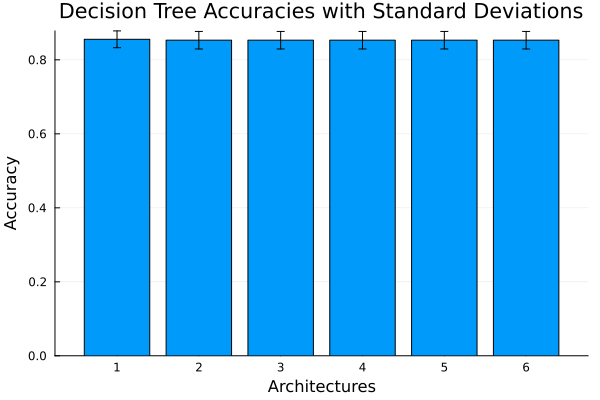

In [6]:
plot_acc_comparison(model, all_metrics)

### Discussion
In this first approach, is noticeable that all the configurations seems to have a similar performance. When using Decission Trees it important to not increase too much the **max_depth** to avoid overfitting. Hence, we will choose 10 as the optimal value of this hyperparameter for this problem.


Now, the **criterion** hyperparameter will be analysed to stablish its best performing value.

### Modifying criterion

In [7]:
hyperparameters = [
    Dict(:max_depth => 10, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "gini", :random_state => seed),
    Dict(:max_depth => 10, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 20, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 50, :criterion => "entropy", :random_state => seed) # Deeper trees can capture more detail but usually leads to overfitting
]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 4 -> 0.881 ± 0.022
Hyperparams set 5 -> 0.877 ± 0.025
Hyperparams set 6 -> 0.877 ± 0.025
Hyperparams set 1 -> 0.856 ± 0.023
Hyperparams set 2 -> 0.853 ± 0.024
Hyperparams set 3 -> 0.853 ± 0.024

----- sensitivity means -----
Hyperparams set 4 -> 0.881 ± 0.022
Hyperparams set 5 -> 0.878 ± 0.025
Hyperparams set 6 -> 0.878 ± 0.025
Hyperparams set 1 -> 0.856 ± 0.023
Hyperparams set 2 -> 0.853 ± 0.024
Hyperparams set 3 -> 0.853 ± 0.024

----- specificity means -----
Hyperparams set 4 -> 0.959 ± 0.009
Hyperparams set 5 -> 0.958 ± 0.01
Hyperparams set 6 -> 0.958 ± 0.01
Hyperparams set 1 -> 0.951 ± 0.009
Hyperparams set 2 -> 0.95 ± 0.009
Hyperparams set 3 -> 0.95 ± 0.009

----- ppv means -----
Hyperparams set 4 -> 0.883 ± 0.0

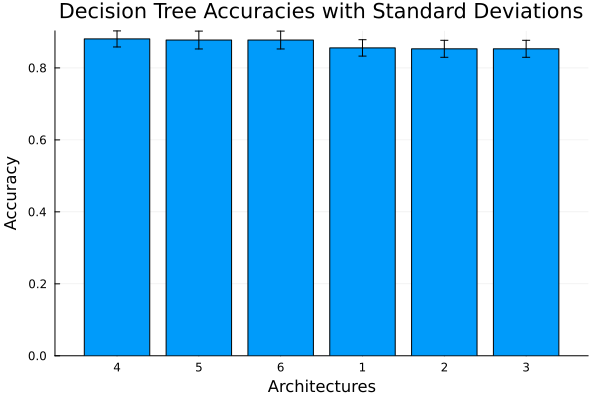

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

With these experiments, it has been discovered that the entropy **criterion** works better that gini.

In the following experiment, it will be revised the value of **max_depth** to determine the optimal one.

### Finding the optimal max_depth 

In [9]:
hyperparameters = [
    Dict(:max_depth => 8,  :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 9,  :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 10, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 11, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 12, :criterion => "entropy", :random_state => seed),
    Dict(:max_depth => 13, :criterion => "entropy", :random_state => seed)
]
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 3 -> 0.881 ± 0.022
Hyperparams set 2 -> 0.879 ± 0.021
Hyperparams set 4 -> 0.877 ± 0.025
Hyperparams set 5 -> 0.877 ± 0.025
Hyperparams set 6 -> 0.877 ± 0.025
Hyperparams set 1 -> 0.87 ± 0.033

----- sensitivity means -----
Hyperparams set 3 -> 0.881 ± 0.022
Hyperparams set 2 -> 0.879 ± 0.021
Hyperparams set 4 -> 0.878 ± 0.025
Hyperparams set 5 -> 0.878 ± 0.025
Hyperparams set 6 -> 0.878 ± 0.025
Hyperparams set 1 -> 0.87 ± 0.033

----- specificity means -----
Hyperparams set 3 -> 0.959 ± 0.009
Hyperparams set 2 -> 0.959 ± 0.008
Hyperparams set 4 -> 0.958 ± 0.01
Hyperparams set 5 -> 0.958 ± 0.01
Hyperparams set 6 -> 0.958 ± 0.01
Hyperparams set 1 -> 0.956 ± 0.012

----- ppv means -----
Hyperparams set 3 -> 0.883 ± 0.02

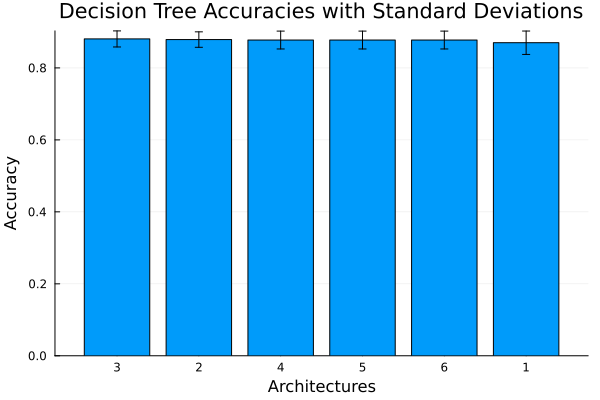

In [10]:
plot_acc_comparison(model, all_metrics)

### Discussion

Finally, we saw little differences between this values. Hence, wi will continue using 10 as the value for **max_depth**

## Final discussion

- To sum up, after having tested several configuration of Decision Tree Classifiers, it has been found that the best performing hyperparameters with an **accuracy** of **0.881 ± 0.022** have been the following values:

1. **Max_depth**: 10
2. **Criterion**: Entropy


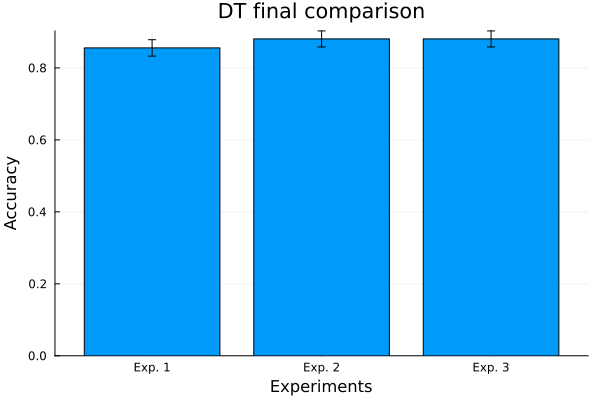

In [11]:
plot_final_comparison("DT final comparison", best_models_acc)